# Chapter 8 - Morphology

In [2]:
# %% Import modules
from dip import *
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 16})

# Set operations

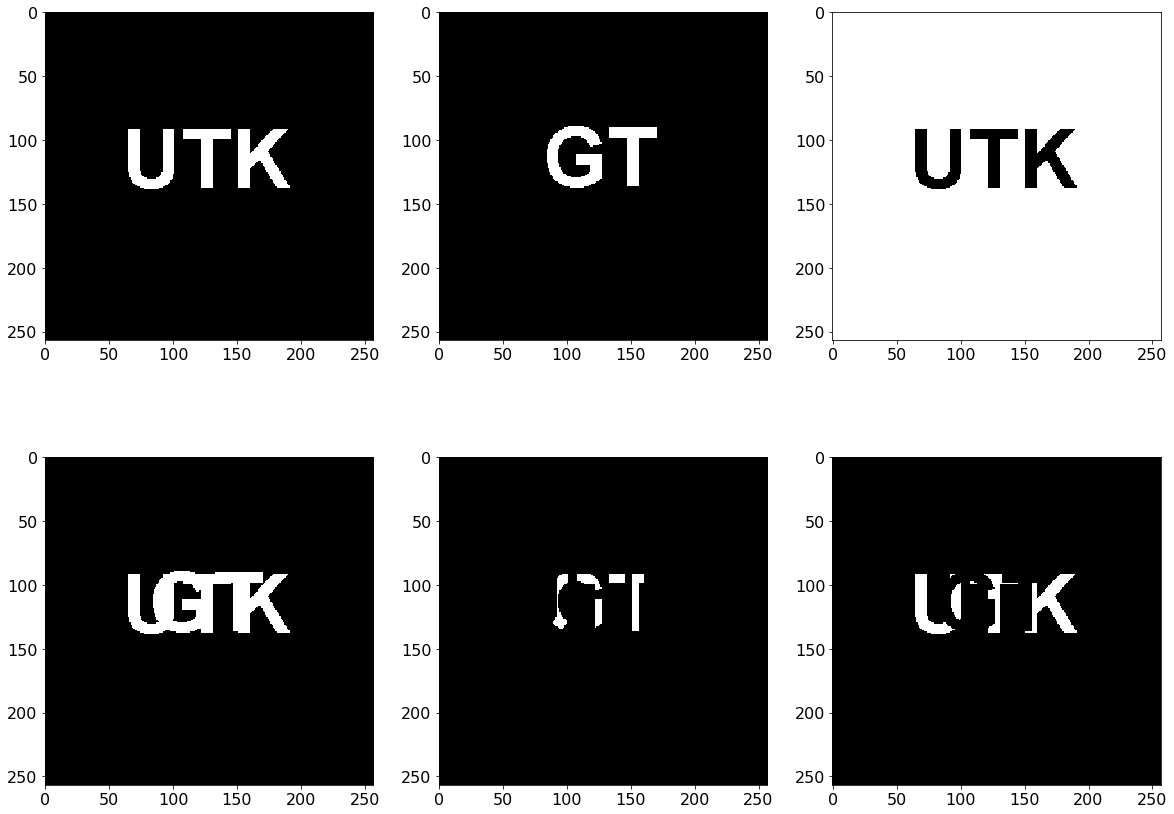

In [3]:
# %% Some set operations
utk = cv2.imread(os.path.join(folder, 'utk.tif'), cv2.IMREAD_GRAYSCALE)
gt = cv2.imread(os.path.join(folder, 'gt.tif'), cv2.IMREAD_GRAYSCALE)

utkc = 255 - utk
utkORgt = cv2.bitwise_or(utk, gt)
utkANDgt = cv2.bitwise_and(utk, gt)
utkMinusgt = cv2.bitwise_and(utk, cv2.bitwise_not(gt))
# utkMinusgt = utk & ~gt

plt.subplot(231), plt.imshow(utk, cmap='gray')
plt.subplot(232), plt.imshow(gt, cmap='gray')
plt.subplot(233), plt.imshow(utkc, cmap='gray')
plt.subplot(234), plt.imshow(utkORgt, cmap='gray')
plt.subplot(235), plt.imshow(utkANDgt, cmap='gray')
plt.subplot(236), plt.imshow(utkMinusgt, cmap='gray')
plt.show()

## Dilation

[[0 1 0]
 [1 1 1]
 [0 1 0]]


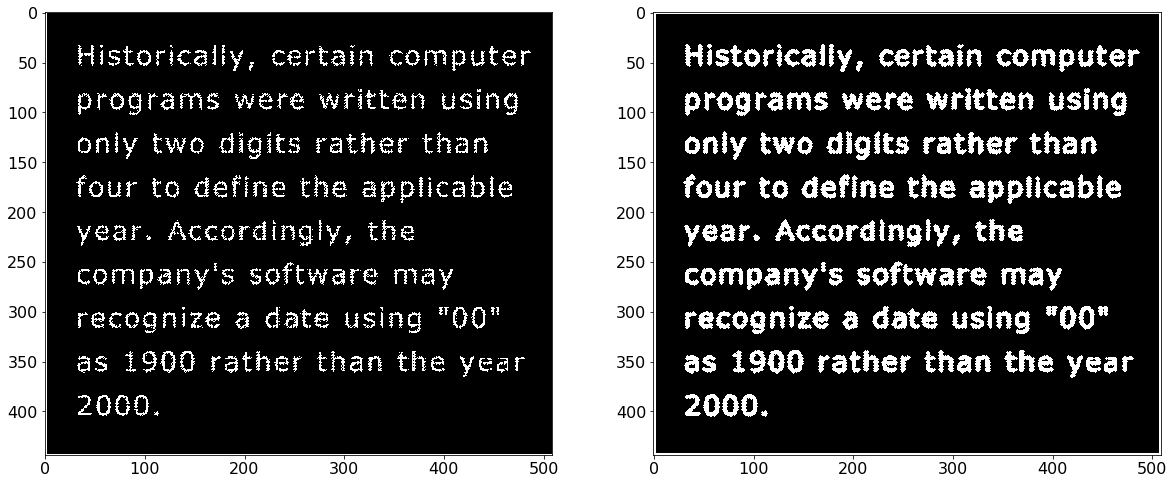

In [4]:
# %% Example
img = cv2.imread(os.path.join(folder, 'text.tif'), cv2.IMREAD_GRAYSCALE)
kernel = np.zeros((3, 3), dtype='uint8')
kernel[:, 1] = 1
kernel[1, :] = 1
print(kernel)

img2 = cv2.dilate(img, kernel, iterations=1)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img2, cmap='gray')
plt.show()

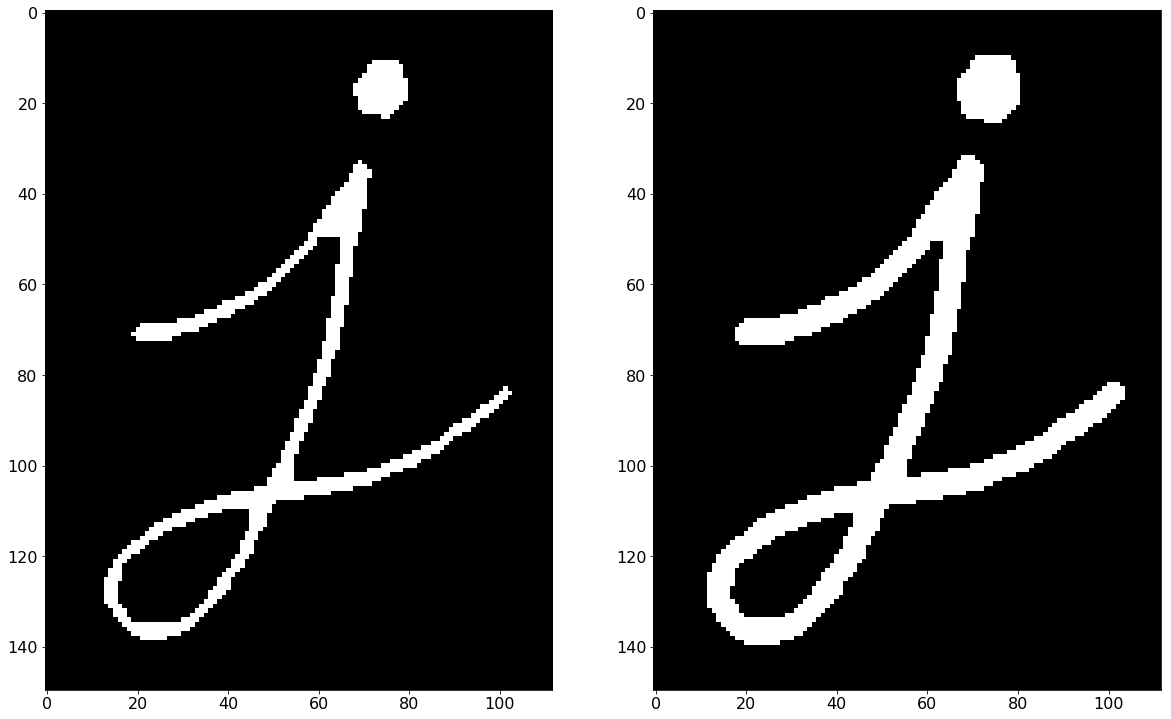

In [5]:
# %% Dilation
j = cv2.imread(os.path.join(folder, 'j.png'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)
j_dilated = cv2.dilate(j, kernel, iterations=1)
plt.subplot(121), plt.imshow(j, cmap='gray')
plt.subplot(122), plt.imshow(j_dilated, cmap='gray')
plt.show()

## Erosion

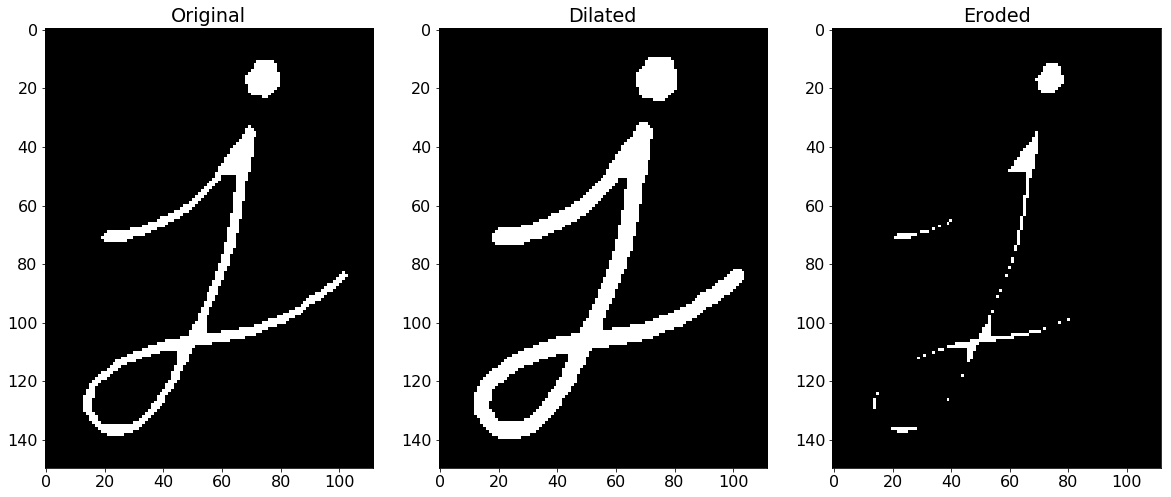

In [6]:
# %% Erosion
j = cv2.imread(os.path.join(folder, 'j.png'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)
j_eroded = cv2.erode(j, kernel, iterations=1)
plt.subplot(131), plt.imshow(j, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(j_dilated, cmap='gray'), plt.title('Dilated')
plt.subplot(133), plt.imshow(j_eroded, cmap='gray'), plt.title('Eroded')
plt.show()

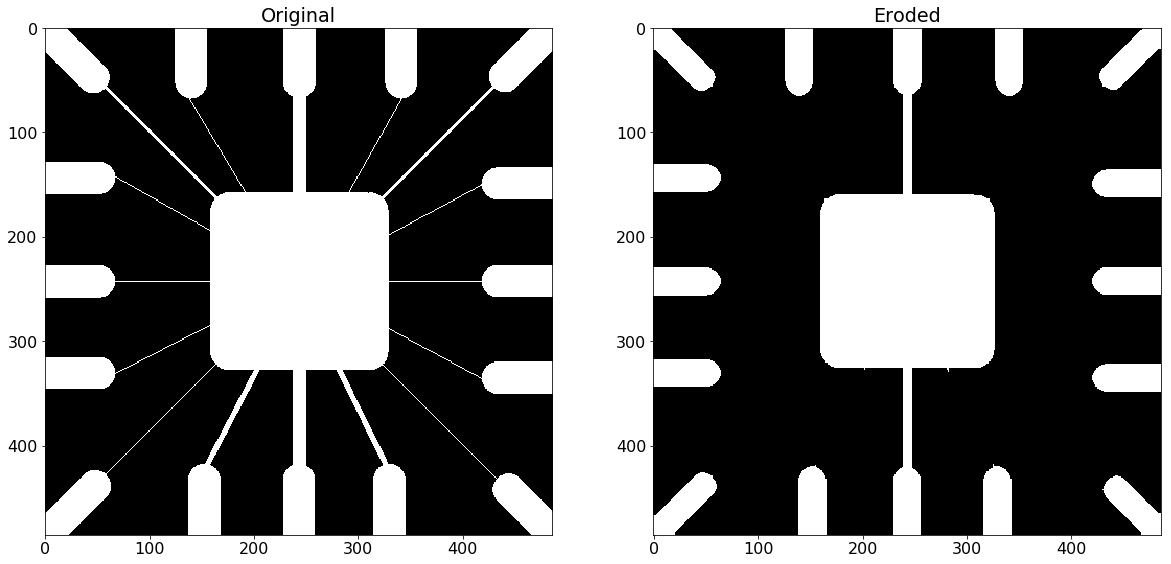

In [7]:
# %% Erosion2
wb = cv2.imread(os.path.join(folder, 'wirebond.tif'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
wb_eroded = cv2.erode(wb, kernel, iterations=1)
plt.subplot(121), plt.imshow(wb, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(wb_eroded, cmap='gray'), plt.title('Eroded')
plt.show()

## Opening

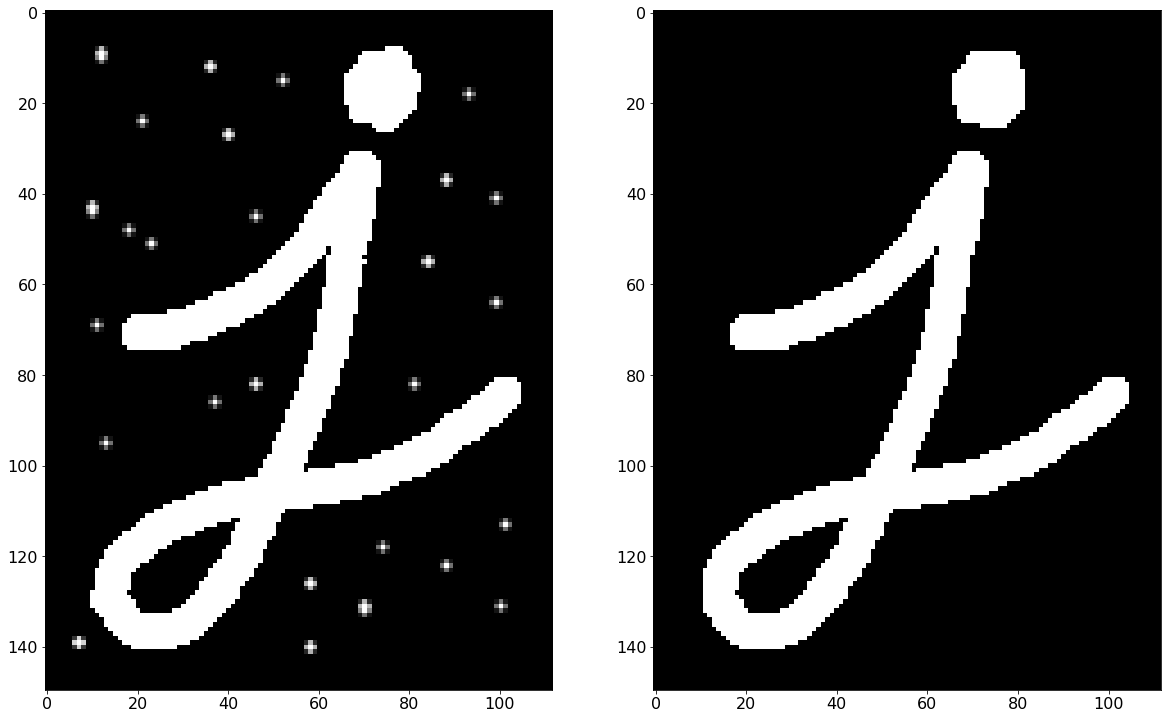

In [8]:
# %% Opening
j_salt = cv2.imread(os.path.join(folder, 'j_salt.png'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
j_cleaned = cv2.morphologyEx(j_salt, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(j_salt, cmap='gray')
plt.subplot(122), plt.imshow(j_cleaned, cmap='gray')
plt.show()

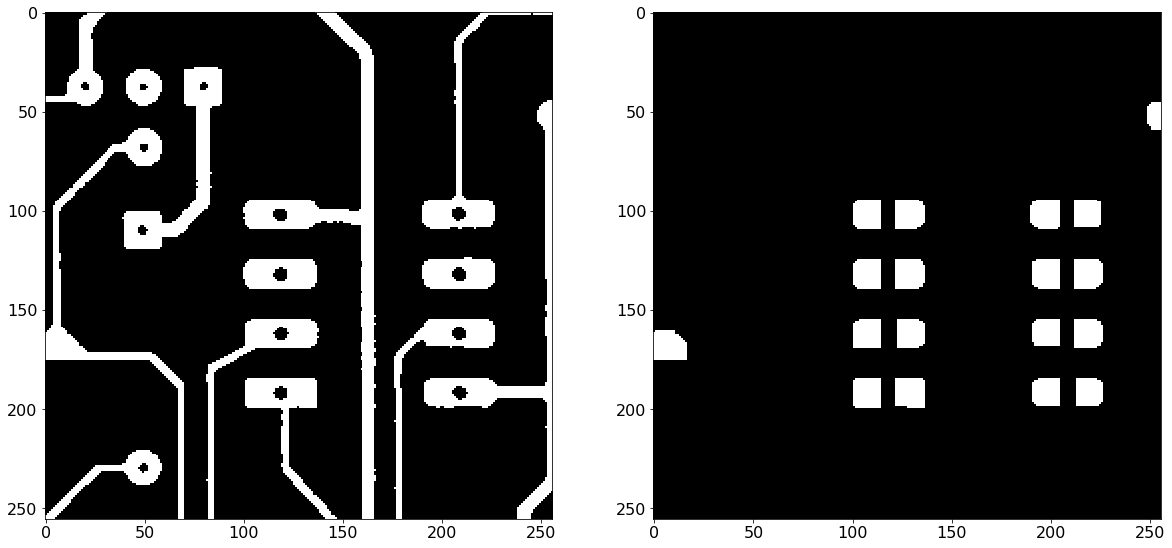

In [9]:
# %% Opening
ckt = cv2.imread(os.path.join(folder, 'ckt2_bw.png'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((9, 9), np.uint8)
ckt2 = cv2.morphologyEx(ckt, cv2.MORPH_OPEN, kernel)

plt.subplot(121), plt.imshow(ckt, cmap='gray')
plt.subplot(122), plt.imshow(ckt2, cmap='gray')
plt.show()

## Closing

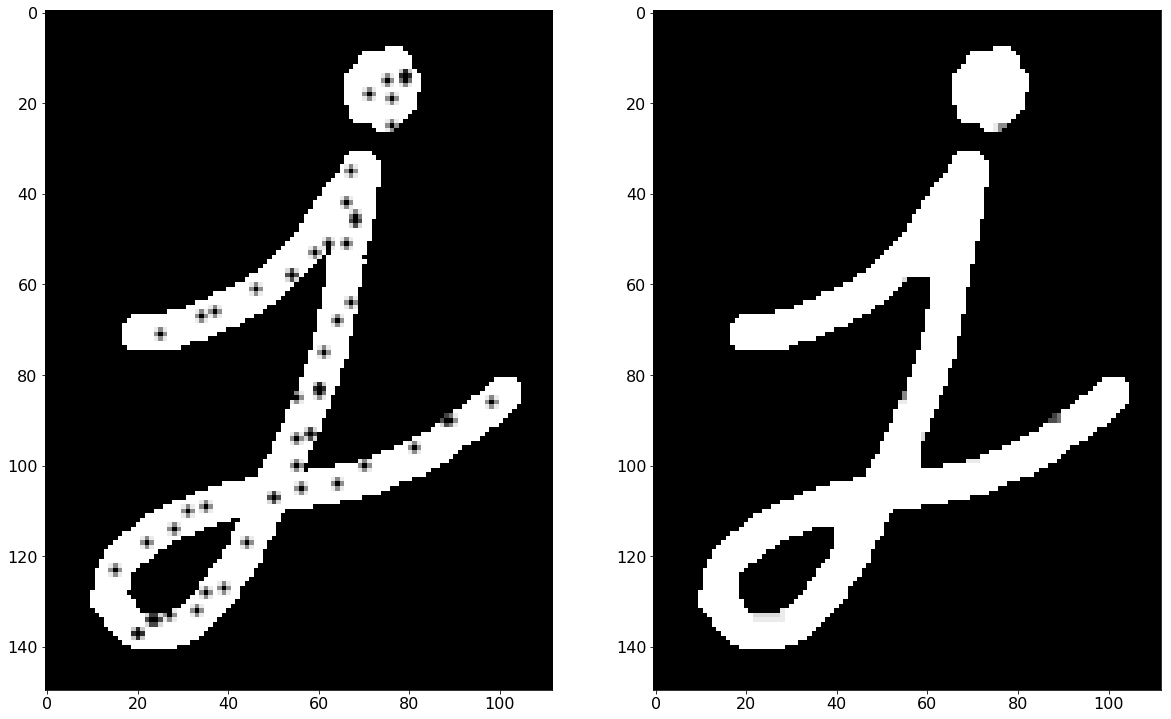

In [10]:
# %% Closing
j_pepper = cv2.imread(os.path.join(folder, 'j_pepper.png'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5, 5), np.uint8)
j_cleaned = cv2.morphologyEx(j_pepper, cv2.MORPH_CLOSE, kernel)

plt.subplot(121), plt.imshow(j_pepper, cmap='gray')
plt.subplot(122), plt.imshow(j_cleaned, cmap='gray')
plt.show()

# Morphology Algorithms

## Noise filtering

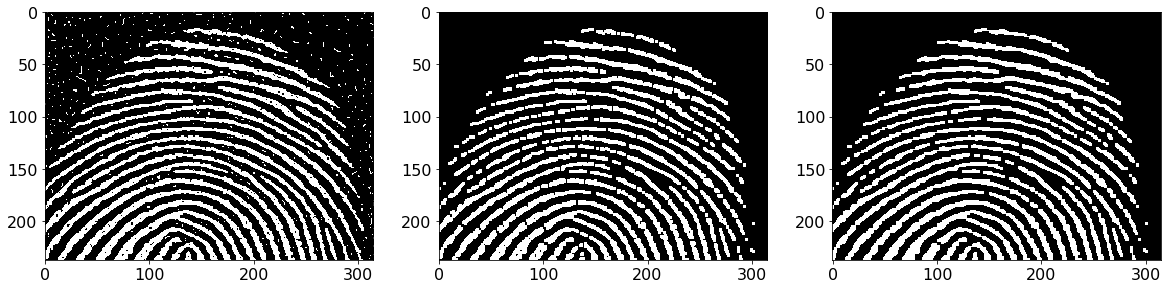

In [11]:
# %% Noise filtering using opening and closing
noisy = cv2.imread(os.path.join(folder, 'noisy-fingerprint.tif'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)
noisy_o = cv2.morphologyEx(noisy, cv2.MORPH_OPEN, kernel)
noisy_oc = cv2.morphologyEx(noisy_o, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(noisy, cmap='gray')
plt.subplot(132), plt.imshow(noisy_o, cmap='gray')
plt.subplot(133), plt.imshow(noisy_oc, cmap='gray')
plt.show()

## Hit-or-miss tranform

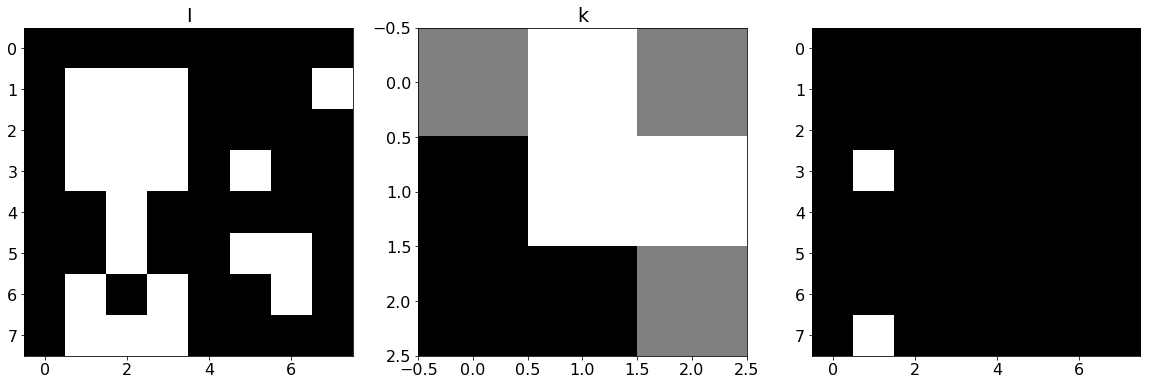

In [12]:
# %% Hit-or-Miss transform
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0, 255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

# kernel = np.array((
#        [0, 1, 0],
#        [1, -1, 1],
#        [0, 1, 0]), dtype="int")
k = np.array((
    [0, 1, 0],
    [-1, 1, 1],
    [-1, -1, 0]), dtype="int")

output_image = cv2.morphologyEx(input_image, cv2.MORPH_HITMISS, k)

plt.subplot(131), plt.imshow(input_image, cmap='gray'), plt.title('I')
plt.subplot(132), plt.imshow(k, cmap='gray'), plt.title('k')
plt.subplot(133), plt.imshow(output_image, cmap='gray'), plt.title('')
plt.show()

## Boundary extraction

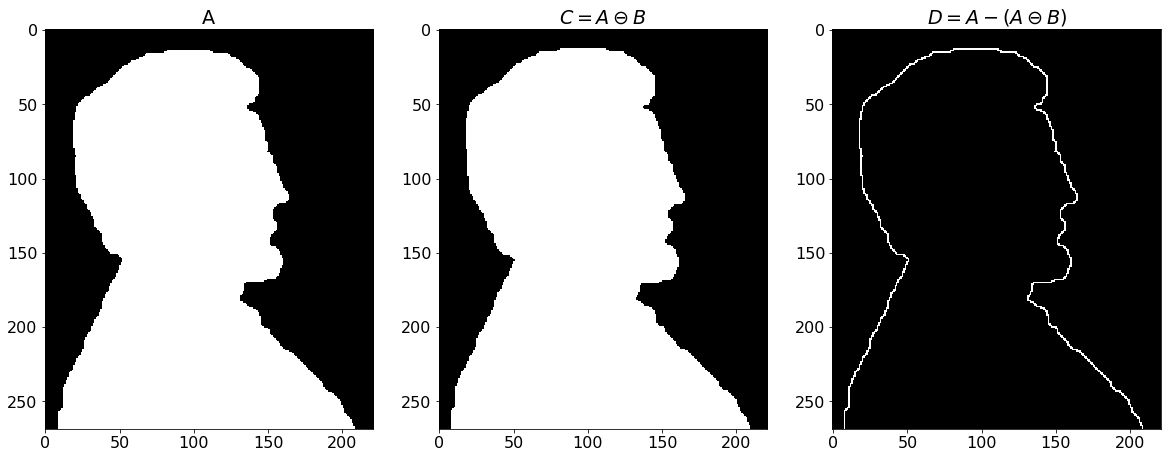

In [13]:
# %% BOUNDARY EXTRACTION
a = cv2.imread(os.path.join(folder, 'lincoln.tif'), cv2.IMREAD_GRAYSCALE)
b = np.ones((3, 3), np.uint8)
c = cv2.morphologyEx(a, cv2.MORPH_DILATE, b)
d = c & ~a

plt.subplot(131), plt.imshow(a, cmap='gray'), plt.title('A')
plt.subplot(132), plt.imshow(c, cmap='gray'), plt.title('$C = A \ominus B$')
plt.subplot(133), plt.imshow(d, cmap='gray'), plt.title('$D = A - (A \ominus B)$')
plt.show()

## Morphological Gradient - 'Border Detection'

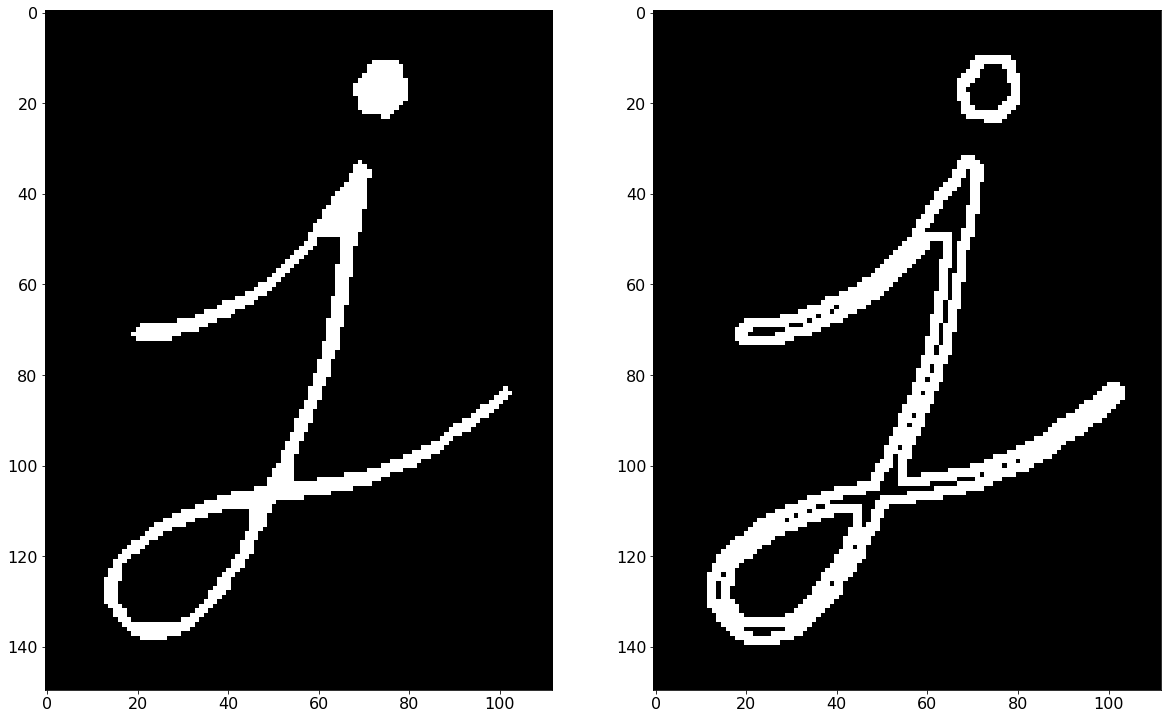

In [14]:
j = cv2.imread(os.path.join(folder, 'j.png'), cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), np.uint8)
gradient = cv2.morphologyEx(j, cv2.MORPH_GRADIENT, kernel)

plt.subplot(121), plt.imshow(j, cmap='gray')
plt.subplot(122), plt.imshow(gradient, cmap='gray')
plt.show()

## Hole filling

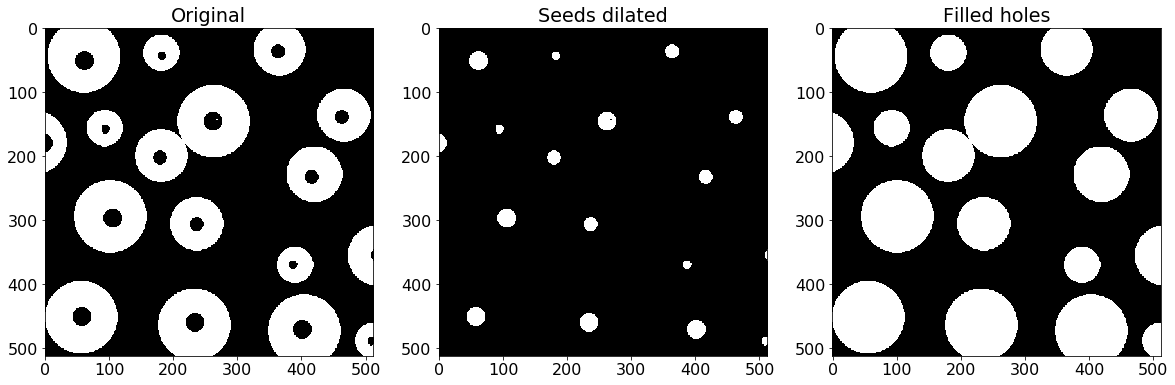

In [15]:
# %% HOLE FILLING
img = cv2.imread(os.path.join(folder, 'region-filling-reflections.tif'),
                 cv2.IMREAD_GRAYSCALE)
imgc = cv2.bitwise_not(img)
strel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
seed = np.zeros((img.shape[0], img.shape[1]), np.uint8)

idxs = [[60,50], [40,180], [36, 360], [180, 5], [158, 95], [140, 260], 
        [140, 460], [200, 178], [233, 413], [295, 105], [305, 235],
        [355, 510], [370, 385], [450, 56], [460, 230], [470, 400],
        [488, 508]]
for i in range(len(idxs)):
    seed[idxs[i][0], idxs[i][1]] = 255

tmp = seed.copy()
while True:
    tmp2 = cv2.dilate(tmp, strel)
    tmp2 = tmp2 & imgc
    if (tmp2 == tmp).all():
        break
    else:
        tmp = tmp2
res = cv2.bitwise_or(img, tmp2)

plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(132), plt.imshow(tmp2, cmap='gray'), plt.title('Seeds dilated')
plt.subplot(133), plt.imshow(res, cmap='gray'), plt.title('Filled holes')
plt.show()

## Extraction of connected components

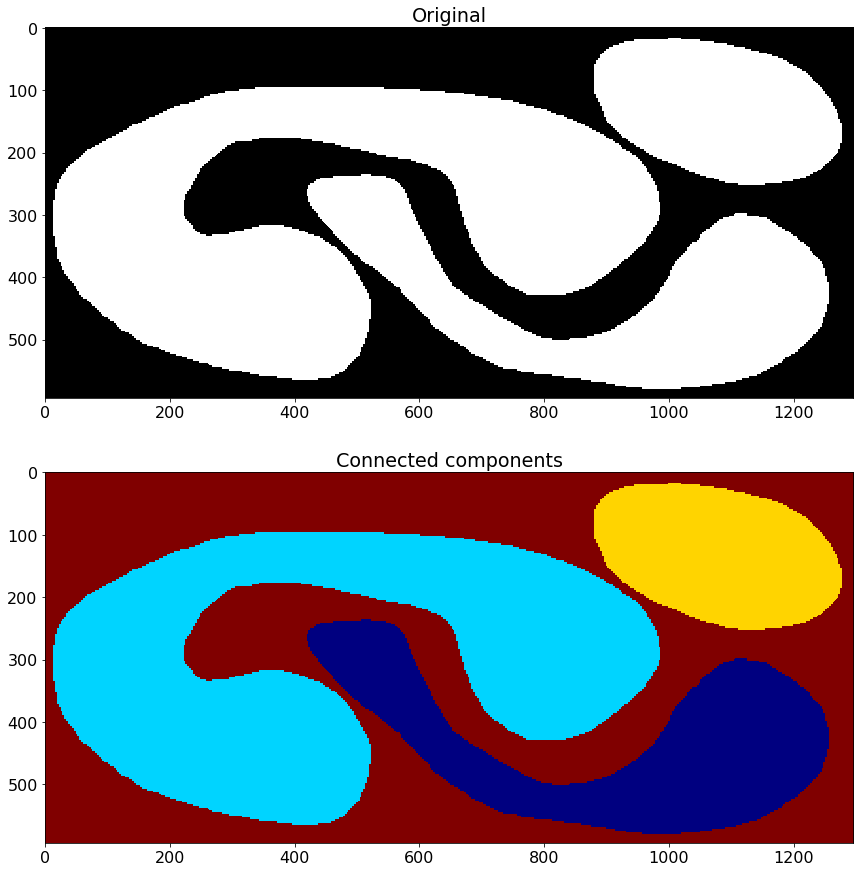

In [16]:
# %% Extraction of connected components
img = cv2.imread(os.path.join(folder, 'elementsbw.png'),
                 cv2.IMREAD_GRAYSCALE)
strel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
seed = np.zeros((img.shape[0], img.shape[1]), np.uint8)

idxs = [[130,1000], [250, 800], [400, 1100]]
nseeds = len(idxs)
for i in range(nseeds):
    seed[idxs[i][0], idxs[i][1]] = (1 + i) * (255/nseeds)

tmp = seed.copy()
while True:
    tmp2 = cv2.dilate(tmp, strel)
    tmp2 = tmp2 & img
    if (tmp2 == tmp).all():
        break
    else:
        tmp = tmp2
res = cv2.applyColorMap(tmp, cv2.COLORMAP_JET)

plt.subplot(211), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(212), plt.imshow(res), plt.title('Connected components')
plt.show()

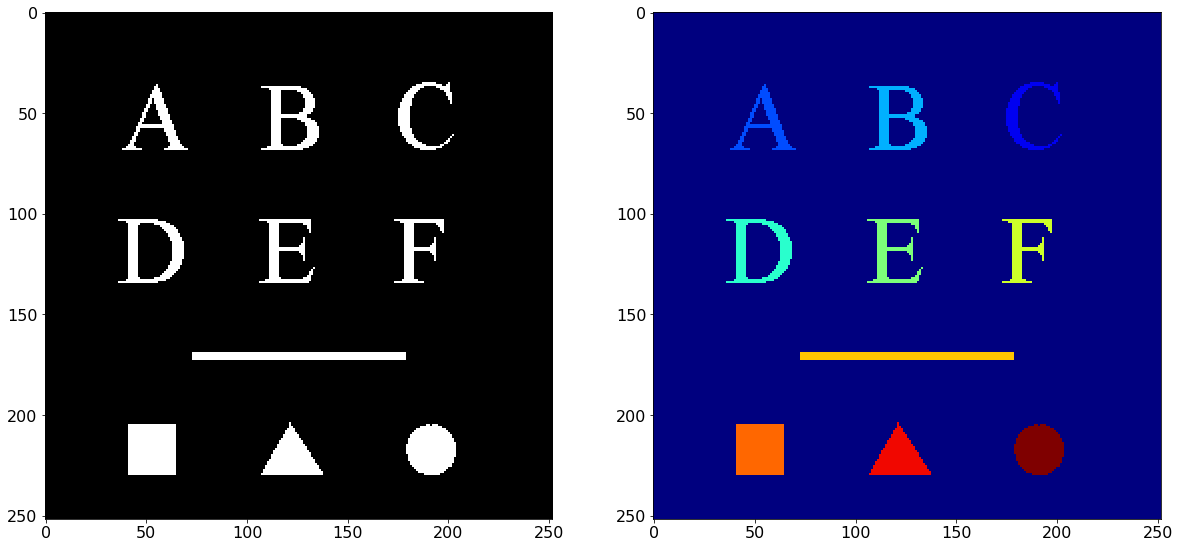

In [17]:
img = cv2.imread(os.path.join(folder, 'ten-objects.tif'), cv2.IMREAD_GRAYSCALE)
labels = []
_, img2 = cv2.connectedComponents(img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img2, cmap='jet')
plt.show()

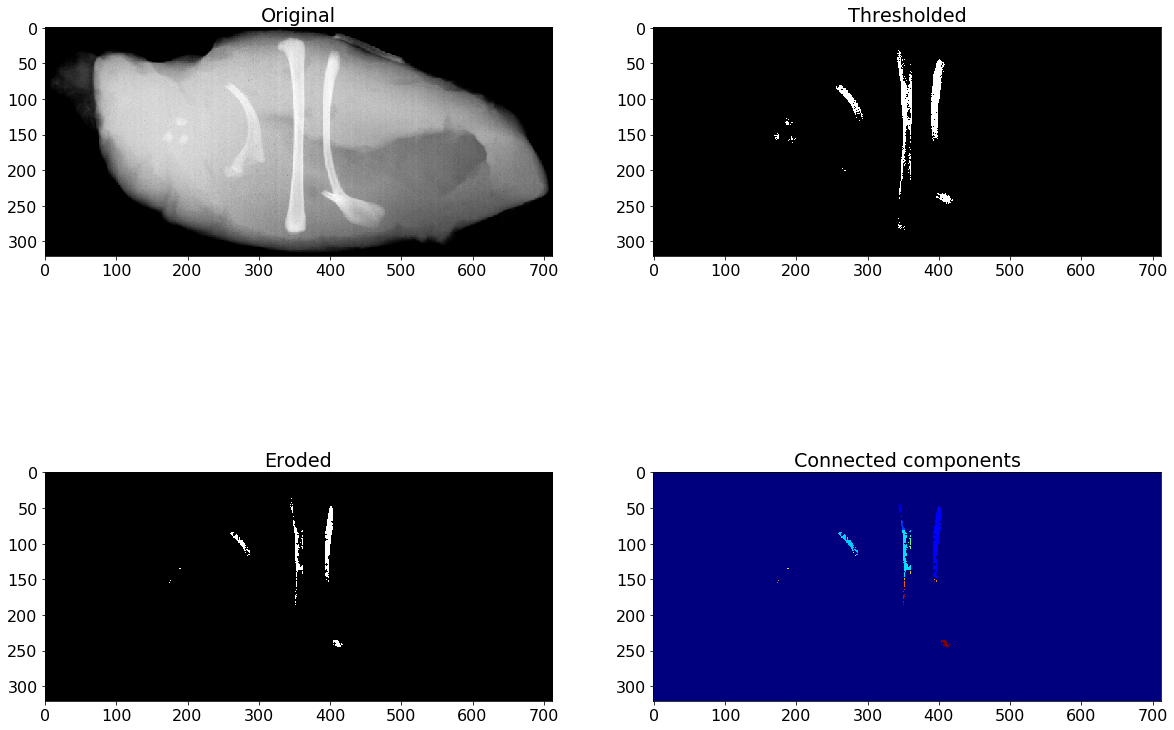

In [18]:
# %% Connected components
img = cv2.imread(os.path.join(folder, 'chickenfillet.tif'), cv2.IMREAD_GRAYSCALE)
_, img_bin = cv2.threshold(img, 210, 255, cv2.THRESH_BINARY, cv2.CV_8U)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (4, 4))
img_erode = cv2.erode(img_bin, kernel, iterations=1)
n_cc, img_cc = cv2.connectedComponents(img_erode)
unique, count = np.unique(img_cc, return_counts=True)

plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(img_bin, cmap='gray'), plt.title('Thresholded')
plt.subplot(223), plt.imshow(img_erode, cmap='gray'), plt.title('Eroded')
plt.subplot(224), plt.imshow(img_cc, cmap='jet'), plt.title('Connected components')
plt.show()

## Convex hull

## Thinning

Number of iterations = 47


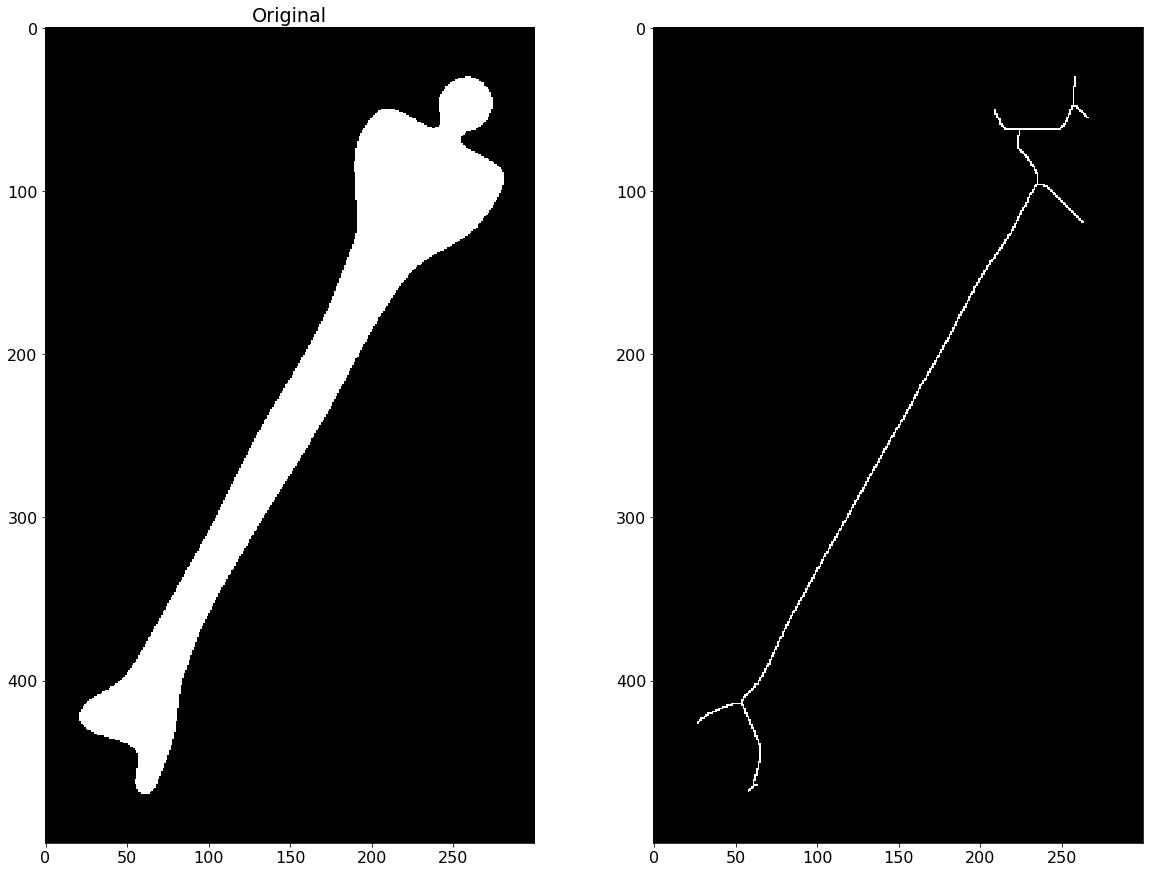

In [19]:
# %% Thinning
f0 = cv2.imread(os.path.join(folder, 'bone.tif'), cv2.IMREAD_GRAYSCALE)
f = f0.copy()

# Define structuring elements
s1 = np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]], dtype='int8')
s2 = np.array([[0, -1, -1], [1, 1, -1], [1, 1, 0]], dtype='int8')
s3 = np.array([[1, 0, -1], [1, 1, -1], [1, 0, -1]], dtype='int8')
s4 = np.array([[1, 1, 0], [1, 1, -1], [0, -1, -1]], dtype='int8')
s5 = np.array([[1, 1, 1], [0, 1, 0], [-1, -1, -1]], dtype='int8')
s6 = np.array([[0, 1, 1], [-1, 1, 1], [-1, -1, 0]], dtype='int8')
s7 = np.array([[-1, 0, 1], [-1, 1, 1], [-1, 0, 1]], dtype='int8')
s8 = np.array([[-1, -1, 0], [-1, 1, 1], [0, 1, 1]], dtype='int8')

tmp = np.zeros(f0.shape, f0.dtype)
counter = 0
while True:
    counter += 1
    tmp = f.copy()
    # Apply the hit-or-miss operation with the 8 structuring elements
    f   = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s1)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s2)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s3)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s4)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s5)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s6)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s7)
    tmp = tmp & ~cv2.morphologyEx(tmp, cv2.MORPH_HITMISS, s8)
    if (tmp == f).all() == True:
        break
    else:
        f = tmp.copy()

print('Number of iterations = ' + str(counter))
plt.subplot(121), plt.imshow(f0, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(f, cmap = 'gray')
plt.show()

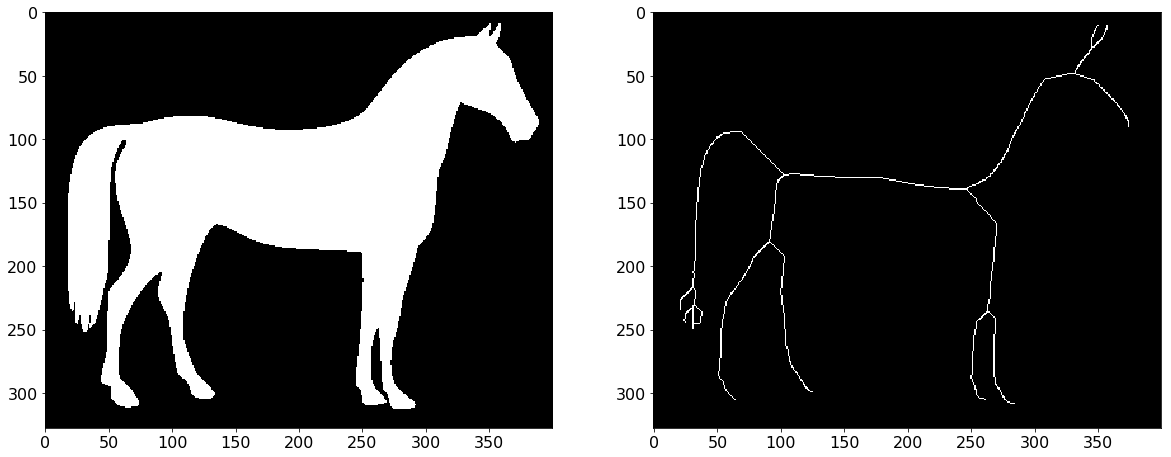

In [20]:
# %% Thinning
img = cv2.imread(os.path.join(folder, 'horse2.png'), cv2.IMREAD_GRAYSCALE)
thinned_img = cv2.ximgproc.thinning(img, cv2.ximgproc.THINNING_GUOHALL)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(thinned_img, cmap = 'gray')
plt.show()

## Skeletons

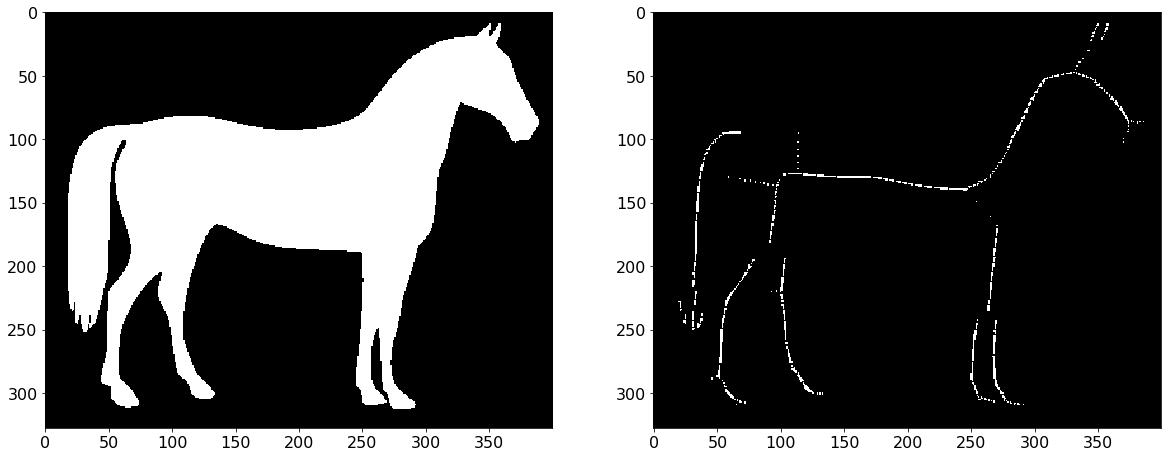

In [21]:
# %% Skeletons
def skeletonize(img):
    """ OpenCV function to return a skeletonized version of img, a Mat object"""
    #  hat tip to http://felix.abecassis.me/2011/09/opencv-morphological-skeleton/

    img = img.copy()  # don't clobber original
    skel = img.copy()

    skel[:, :] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    while True:
        eroded = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp = cv2.subtract(img, temp)
        skel = cv2.bitwise_or(skel, temp)
        img[:, :] = eroded[:, :]
        if cv2.countNonZero(img) == 0:
            break
    return skel

img = cv2.imread(os.path.join(folder, 'horse2.png'), cv2.IMREAD_GRAYSCALE)
img2 = skeletonize(img)
cv2.imwrite(os.path.join(folder, 'horse_skeletonized.png'), img2)

plt.figure()
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img2, cmap='gray')
plt.show()